In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
# Any results you write to the current directory are saved as output.

In [2]:
# Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.
train = pd.read_excel (r'data.xlsx')

In [3]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [4]:
# getting the shapes of the datasets
print("Shape of Train :", train.shape)

Shape of Train : (233154, 41)


In [5]:
# get the info of train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [6]:
# getting the data types of train
train.dtypes

UniqueID                                        int64
disbursed_amount                                int64
asset_cost                                      int64
ltv                                           float64
branch_id                                       int64
supplier_id                                     int64
manufacturer_id                                 int64
Current_pincode_ID                              int64
Date.of.Birth                          datetime64[ns]
Employment.Type                                object
DisbursalDate                          datetime64[ns]
State_ID                                        int64
Employee_code_ID                                int64
MobileNo_Avl_Flag                               int64
Aadhar_flag                                     int64
PAN_flag                                        int64
VoterID_flag                                    int64
Driving_flag                                    int64
Passport_flag               

In [7]:
# The presented data might also contain some missing values therefore, exploration will also lead to devising strategies to fill in the missing values while exploring the data
# checking if there exists any NULL values in the train set
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [8]:
# checking the values present in the Employement.Type attribute in the train and test sets
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [9]:
# filling the missing values in the Employment.Type attribute of train and test sets

# Employement Type has two types of Employment i.e., self employed and salaried
# but the empty values must be the people who don't  work at all that's why it is empty
# let's fill unemployed in the place of Null values

train['Employment.Type'].fillna('Unemployed', inplace = True)

# let's check if there is any null values still left or not
print("Null values left in the train set:", train.isnull().sum().sum())

Null values left in the train set: 0


In [10]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Unemployed         7661
Name: Employment.Type, dtype: int64

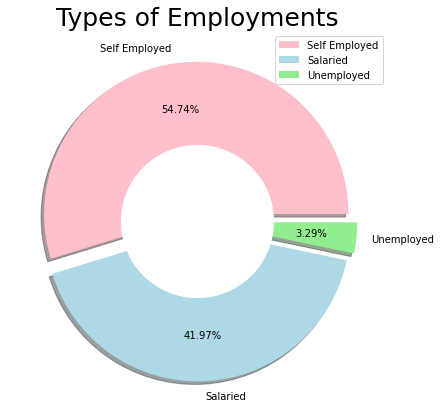

In [11]:
# plotting a donut chart

size = [127635, 97858, 7661]
colors = ['pink', 'lightblue', 'lightgreen']
labels = "Self Employed", "Salaried", "Unemployed" 
explode = [0.05, 0.05, 0.05]

circle = plt.Circle((0, 0), 0.5, color = 'white')

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 0.7, autopct = '%.2f%%')
plt.title('Types of Employments', fontsize = 25)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

In [12]:
employ_loandef=train.groupby(['Employment.Type', 'loan_default']).size()
emp_loan_prct=employ_loandef.apply(lambda x: 100*x/employ_loandef.sum())
emp_loan_prct

Employment.Type  loan_default
Salaried         0               33.431981
                 1                8.539420
Self employed    0               42.280210
                 1               12.462578
Unemployed       0                2.580698
                 1                0.705113
dtype: float64

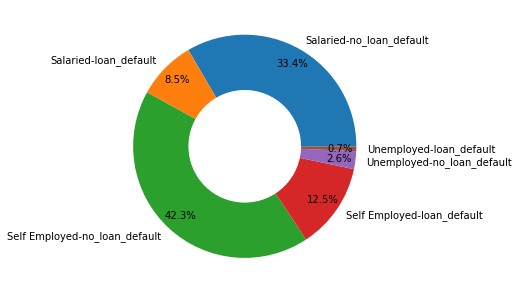

In [13]:
mylabel= "Salaried-no_loan_default","Salaried-loan_default","Self Employed-no_loan_default","Self Employed-loan_default", "Unemployed-no_loan_default","Unemployed-loan_default"
circle = plt.Circle((0, 0), 0.5, color = 'white')
plt.rcParams['figure.figsize'] = (5, 15)
plt.pie(employ_loandef,labels=mylabel, autopct='%1.1f%%', pctdistance=0.85)
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [14]:
# encodings for type of employments

train['Employment.Type'] = train['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))

# checking the values  of employement type
train['Employment.Type'].value_counts()

2    127635
1     97858
0      7661
Name: Employment.Type, dtype: int64

In [15]:
train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [16]:
#let's check the unique values of ids in different branchs

print("Total no. of Unique Ids :", train['UniqueID'].nunique())
print("Total no. of Unique Branches :", train['branch_id'].nunique())
print("Total no. of Unique Suppliers :", train['supplier_id'].nunique())
print("Total no. of Unique Manufactures :", train['manufacturer_id'].nunique())
print("Total no. of Unique Current pincode Ids :", train['Current_pincode_ID'].nunique())
print("Total no. of Unique State IDs :",train['State_ID'].nunique())
print("Total no. of Unique Employee code IDs :", train['Employee_code_ID'].nunique())

Total no. of Unique Ids : 233154
Total no. of Unique Branches : 82
Total no. of Unique Suppliers : 2953
Total no. of Unique Manufactures : 11
Total no. of Unique Current pincode Ids : 6698
Total no. of Unique State IDs : 22
Total no. of Unique Employee code IDs : 3270


In [17]:
# Provide the statistical description of the quantitative data variables
# let's decsribe the train set
train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,1.514570,7.262243,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,0.561699,4.482230,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,0.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,1.000000,4.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,2.000000,6.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,2.000000,10.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,2.000000,22.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


<AxesSubplot:xlabel='loan_default', ylabel='Count'>

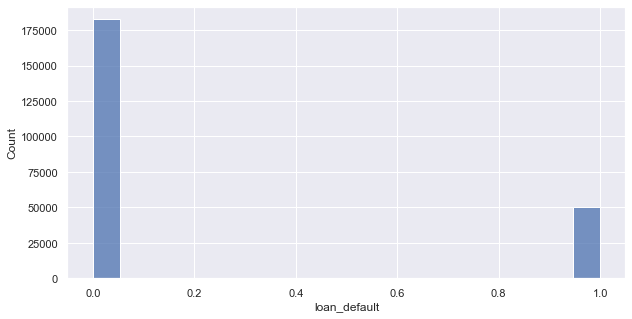

In [21]:
# Explain how is the target variable distributed overall
# Histogram for loan defaulter
#train.plot.bar(y='loan_default', rot=0)
#plt.bar('loan_default')
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(x='loan_default',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '5'),
  Text(4, 0, '7'),
  Text(5, 0, '8'),
  Text(6, 0, '9'),
  Text(7, 0, '10'),
  Text(8, 0, '11'),
  Text(9, 0, '13'),
  Text(10, 0, '14'),
  Text(11, 0, '15'),
  Text(12, 0, '16'),
  Text(13, 0, '17'),
  Text(14, 0, '18'),
  Text(15, 0, '19'),
  Text(16, 0, '20'),
  Text(17, 0, '29'),
  Text(18, 0, '34'),
  Text(19, 0, '35'),
  Text(20, 0, '36'),
  Text(21, 0, '42'),
  Text(22, 0, '43'),
  Text(23, 0, '48'),
  Text(24, 0, '61'),
  Text(25, 0, '62'),
  Text(26, 0, '63'),
  Text(27, 0, '64'),
  Text(28, 0, '65'),
  Text(29, 0, '66'),
  Text(30, 0, '67

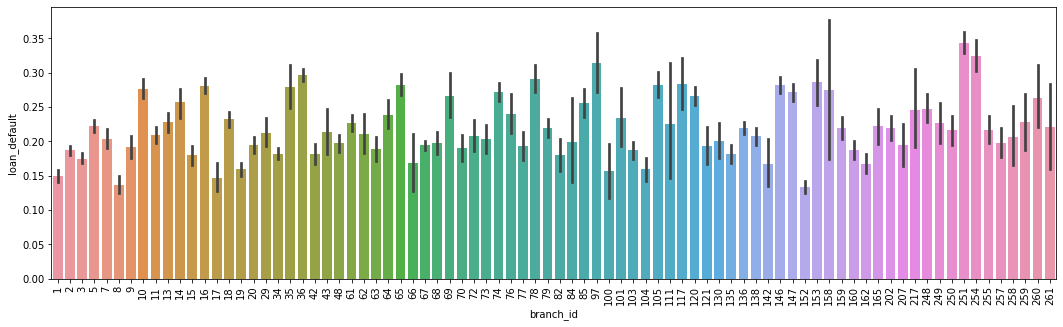

In [19]:
fig, ax = plt.subplots(figsize=(18,5))
sns.barplot(y='loan_default',x='branch_id',data=train,ax=ax)
plt.xticks(rotation=90)
#plt.bar('loan_default','branch_id',data=train)

In [23]:
train.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,0.013869,-0.057734,...,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.041106,-0.023956,...,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,0.015449,-0.026348,...,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,-0.077431,0.004882,...,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,-0.010865,0.187782,...,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.080914,0.105502,...,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,-0.026248,0.026412,...,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.150706,0.047903,...,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
Employment.Type,0.013869,-0.041106,0.015449,-0.077431,-0.010865,0.080914,-0.026248,0.150706,1.000000,-0.054752,...,0.002742,0.001027,0.001225,0.001179,0.009282,-0.004238,0.005380,0.014894,0.010080,0.025377
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,-0.054752,1.000000,...,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075


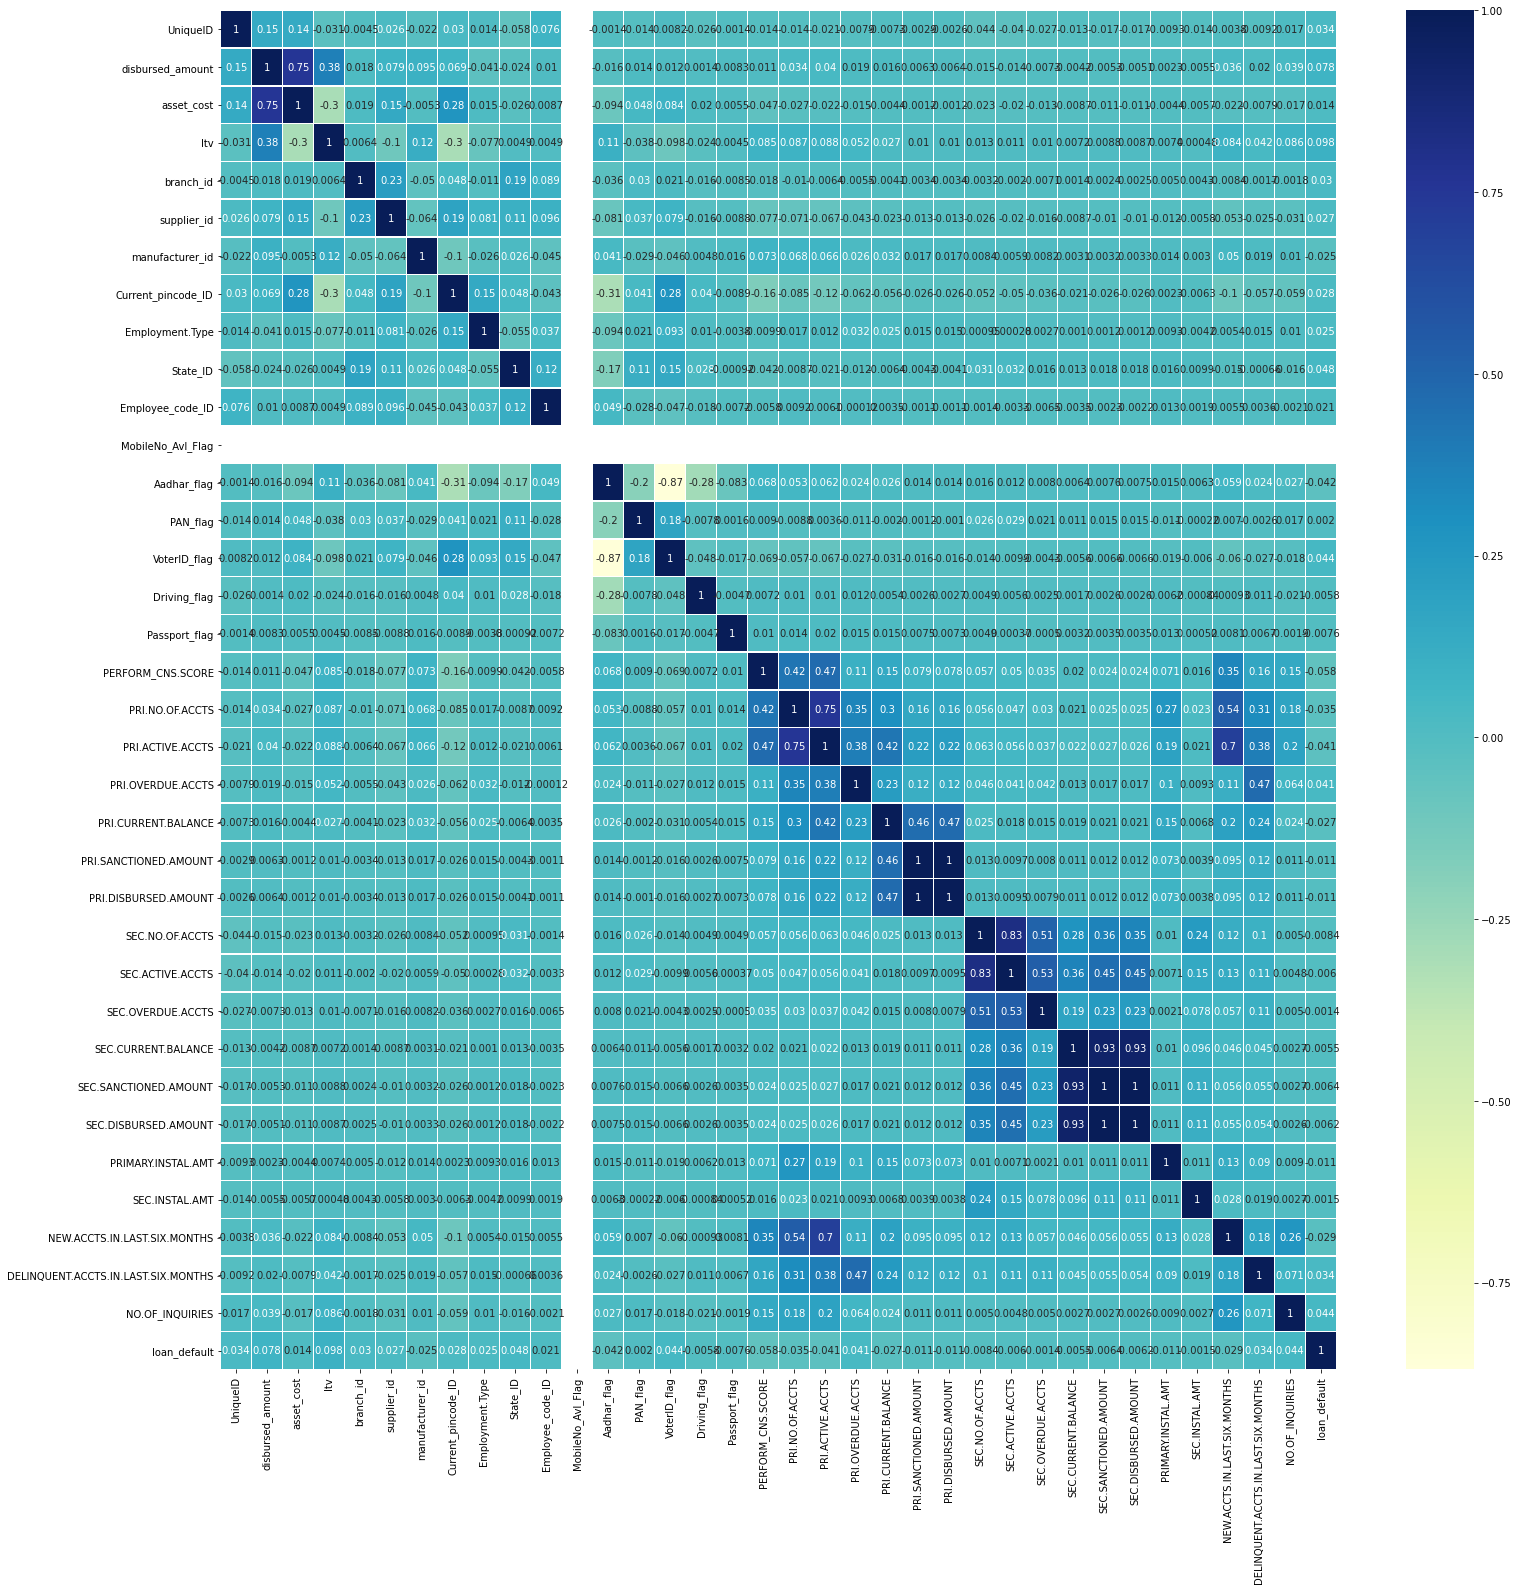

In [30]:
fig, ax = plt.subplots(figsize=(25,25))
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True,linewidth=0.4,ax=ax)

# asset_cost & disbursed amount: 0.75
# primary no. of account & pri. active account: 0.75
# primary disbursed amount & primary sanctioned amount: 1
# sec. no. of account & sec. active account: 0.83
# Sec. overdue account & sec. active account: 0.53
# Sec. overdue account & sec. no. of account: 0.51
# sec. sanctioned amount & Sec. current balance: 0.93
# sec. sanctioned amount & sec. disbursed amount: 0.93
# new account in six months & pri. active account: 0.7
# new account in six months & primary no. of account: 0.54

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

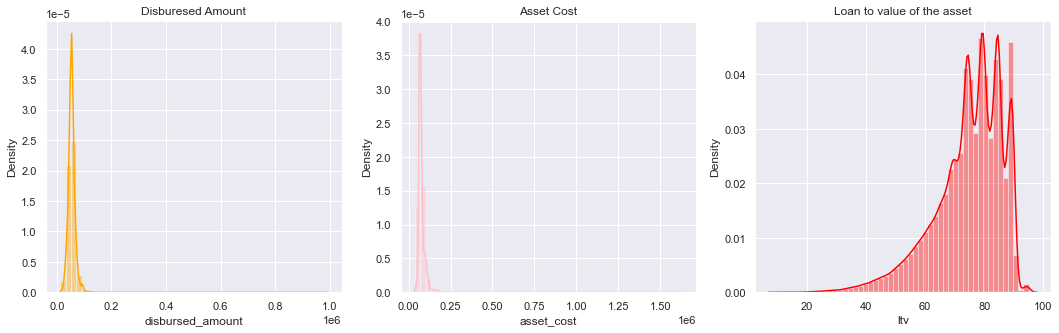

In [24]:
# check the distribution of disbursed amount

plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(train['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(train['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(train['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

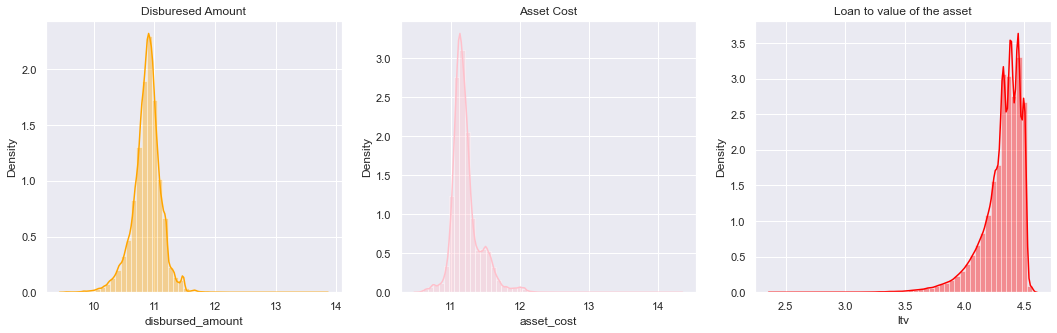

In [25]:
#performing log transformations on disbursed amount, ltv, and asset cost

train['disbursed_amount'] = np.log1p(train['disbursed_amount'])
train['ltv'] = np.log1p(train['ltv'])
train['asset_cost'] = np.log1p(train['asset_cost'])


plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(train['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(train['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(train['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Year of birth')

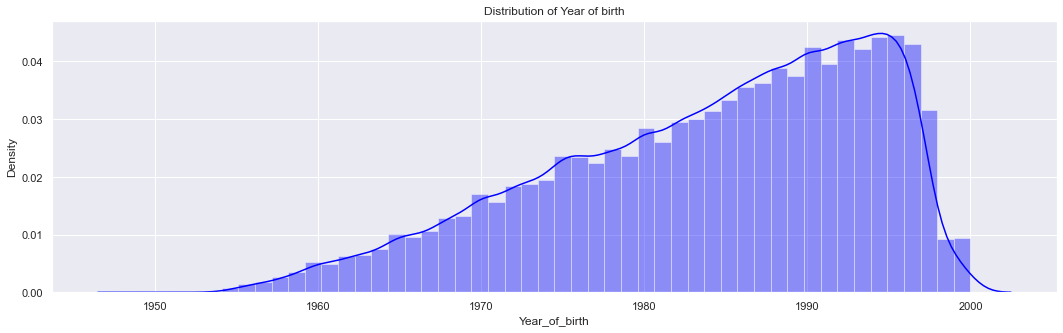

In [26]:
# date of birth is an useless attribute 
#  the only thing we can extract the is the year of birth
# let's first convert the date into date-time format
plt.rcParams['figure.figsize'] = (18, 5)

train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'], errors = 'coerce')

# extracting the year of birth of the customers
train['Year_of_birth'] = train['Date.of.Birth'].dt.year

# checking the values inside date of year
sns.distplot(train['Year_of_birth'], color = 'blue')
plt.title('Distribution of Year of birth')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


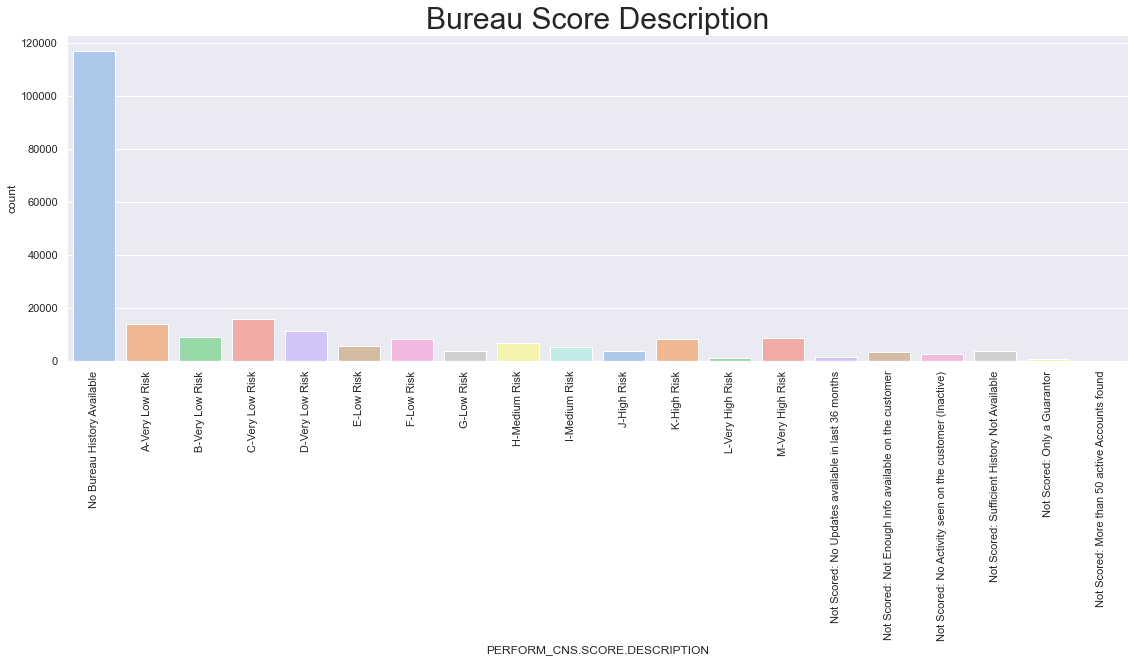

In [27]:
# checking the bureau score description

plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(train['PERFORM_CNS.SCORE.DESCRIPTION'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of Inquiries')

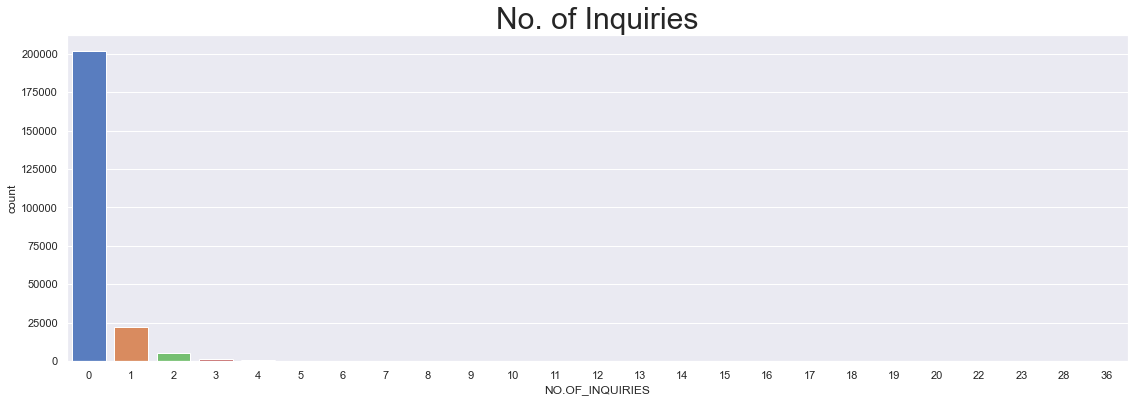

In [28]:
# plotting a countplot

sns.countplot(train['NO.OF_INQUIRIES'], palette = 'muted')
plt.title('No. of Inquiries',  fontsize = 30)


In [159]:
# removing unnecassary columns

train1 = train.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'Employee_code_ID','Year_of_birth','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1)

# checking the new columns of data
train1.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'manufacturer_id',
       'Employment.Type', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'loan_default'],
      dtype='object')

In [160]:
train1.sample(5)

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
162017,10.758881,11.155250,4.243339,70,51,1,4,1,1,0,...,0,0,0,0,3072,0,0,0,0,1
211979,10.255200,11.272318,3.664331,1,86,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
167352,10.654786,11.087069,4.224788,79,45,1,18,1,1,0,...,0,0,0,0,21079,0,0,0,0,0
174877,10.899162,11.580341,3.978934,160,51,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
126029,11.022131,11.478241,4.192983,104,51,1,10,1,1,0,...,0,0,0,0,2089,0,0,0,0,0


In [161]:
# some attributes are categorical but they are in integer so let's convert them into category

train1['branch_id'] = train1['branch_id'].astype('category')
train1['manufacturer_id'] = train1['manufacturer_id'].astype('category')
train1['State_ID'] = train1['State_ID'].astype('category')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train1['branch_id'] = le.fit_transform(train1['branch_id'])
train1['manufacturer_id'] = le.fit_transform(train1['manufacturer_id'])
train1['State_ID'] = le.fit_transform(train1['State_ID'])

# checking the values in these attributes
#data['branch_id'].value_counts()
#data['manufacturer_id'].value_counts()
#data['State_ID'].value_counts()

In [162]:
# checking the target variable : loan defaulter
y_train = train1.iloc[:, -1]

In [163]:
y_train.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [164]:
train1.head()

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
0,10.831292,10.975088,4.505902,30,0,1,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,10.883298,11.024530,4.506785,30,0,2,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10.866261,11.007104,4.493009,30,0,2,5,1,1,0,...,0,0,0,0,0,0,0,0,1,1
3,10.743977,11.026809,4.349245,30,0,1,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,10.682698,11.267754,4.069027,30,5,2,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
X = train1.iloc[:233154,:31]

In [169]:
X = X.astype({"disbursed_amount":'int', "asset_cost":'int',"ltv":'int'}) 

In [170]:
X.head()

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
0,10,10,4,30,0,1,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,10,11,4,30,0,2,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10,11,4,30,0,2,5,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,10,11,4,30,0,1,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,10,11,4,30,5,2,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   disbursed_amount                     233154 non-null  int32
 1   asset_cost                           233154 non-null  int32
 2   ltv                                  233154 non-null  int32
 3   branch_id                            233154 non-null  int64
 4   manufacturer_id                      233154 non-null  int64
 5   Employment.Type                      233154 non-null  int64
 6   State_ID                             233154 non-null  int64
 7   MobileNo_Avl_Flag                    233154 non-null  int64
 8   Aadhar_flag                          233154 non-null  int64
 9   PAN_flag                             233154 non-null  int64
 10  VoterID_flag                         233154 non-null  int64
 11  Driving_flag                         23

In [172]:
y = train1["loan_default"]

In [173]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: loan_default, dtype: int64

In [174]:
 from sklearn.model_selection import train_test_split

In [175]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [179]:
logisticRegr.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [181]:
y_pred=logisticRegr.predict(x_test)

In [182]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[45568,    33],
       [12683,     5]], dtype=int64)

Text(0.5, 384.16, 'Predicted label')

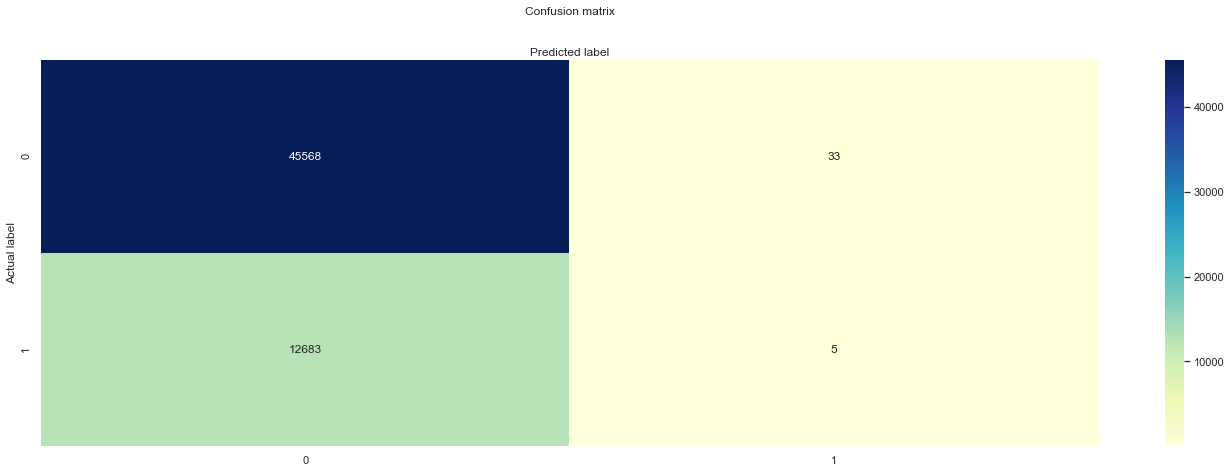

In [196]:
# cm = confusion_matrix(y_valid, y_pred)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [185]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7818456312511795
Precision: 0.13157894736842105
Recall: 0.0003940731399747793
